# Eurocontrol sentiment analysis

## Data sources

Details some of the data sources that could be useful in the frame of a sentiment analysis.

### Skyscanner

It provides an API that allows to answer the following kind of question: (https://www.partners.skyscanner.net/data/travel-insight)
    - What are the most searched destinations during the last month ?
    - Where people are flying to based on a specific location ?
    - What's the average number of travellers choosing a specific route ?

It can also give access to Covid-19 related information (through API) that can be added on top of travel insight information (https://www.partners.skyscanner.net/data/travel-insight/covid-19)

### Aviation edge

The airline route API provides information on the routes that are currently open for any airport in the world (https://aviation-edge.com/airline-routes-database-and-api/)

### Anna.aero

RSS feeds on the latest airline routes

### Twitter

Searching tweets related to compagnies making up the Airlines for Europe Operator Group. It can give a rough idea on how the european airline companies will work since it makes up 70% of the european airline companies.

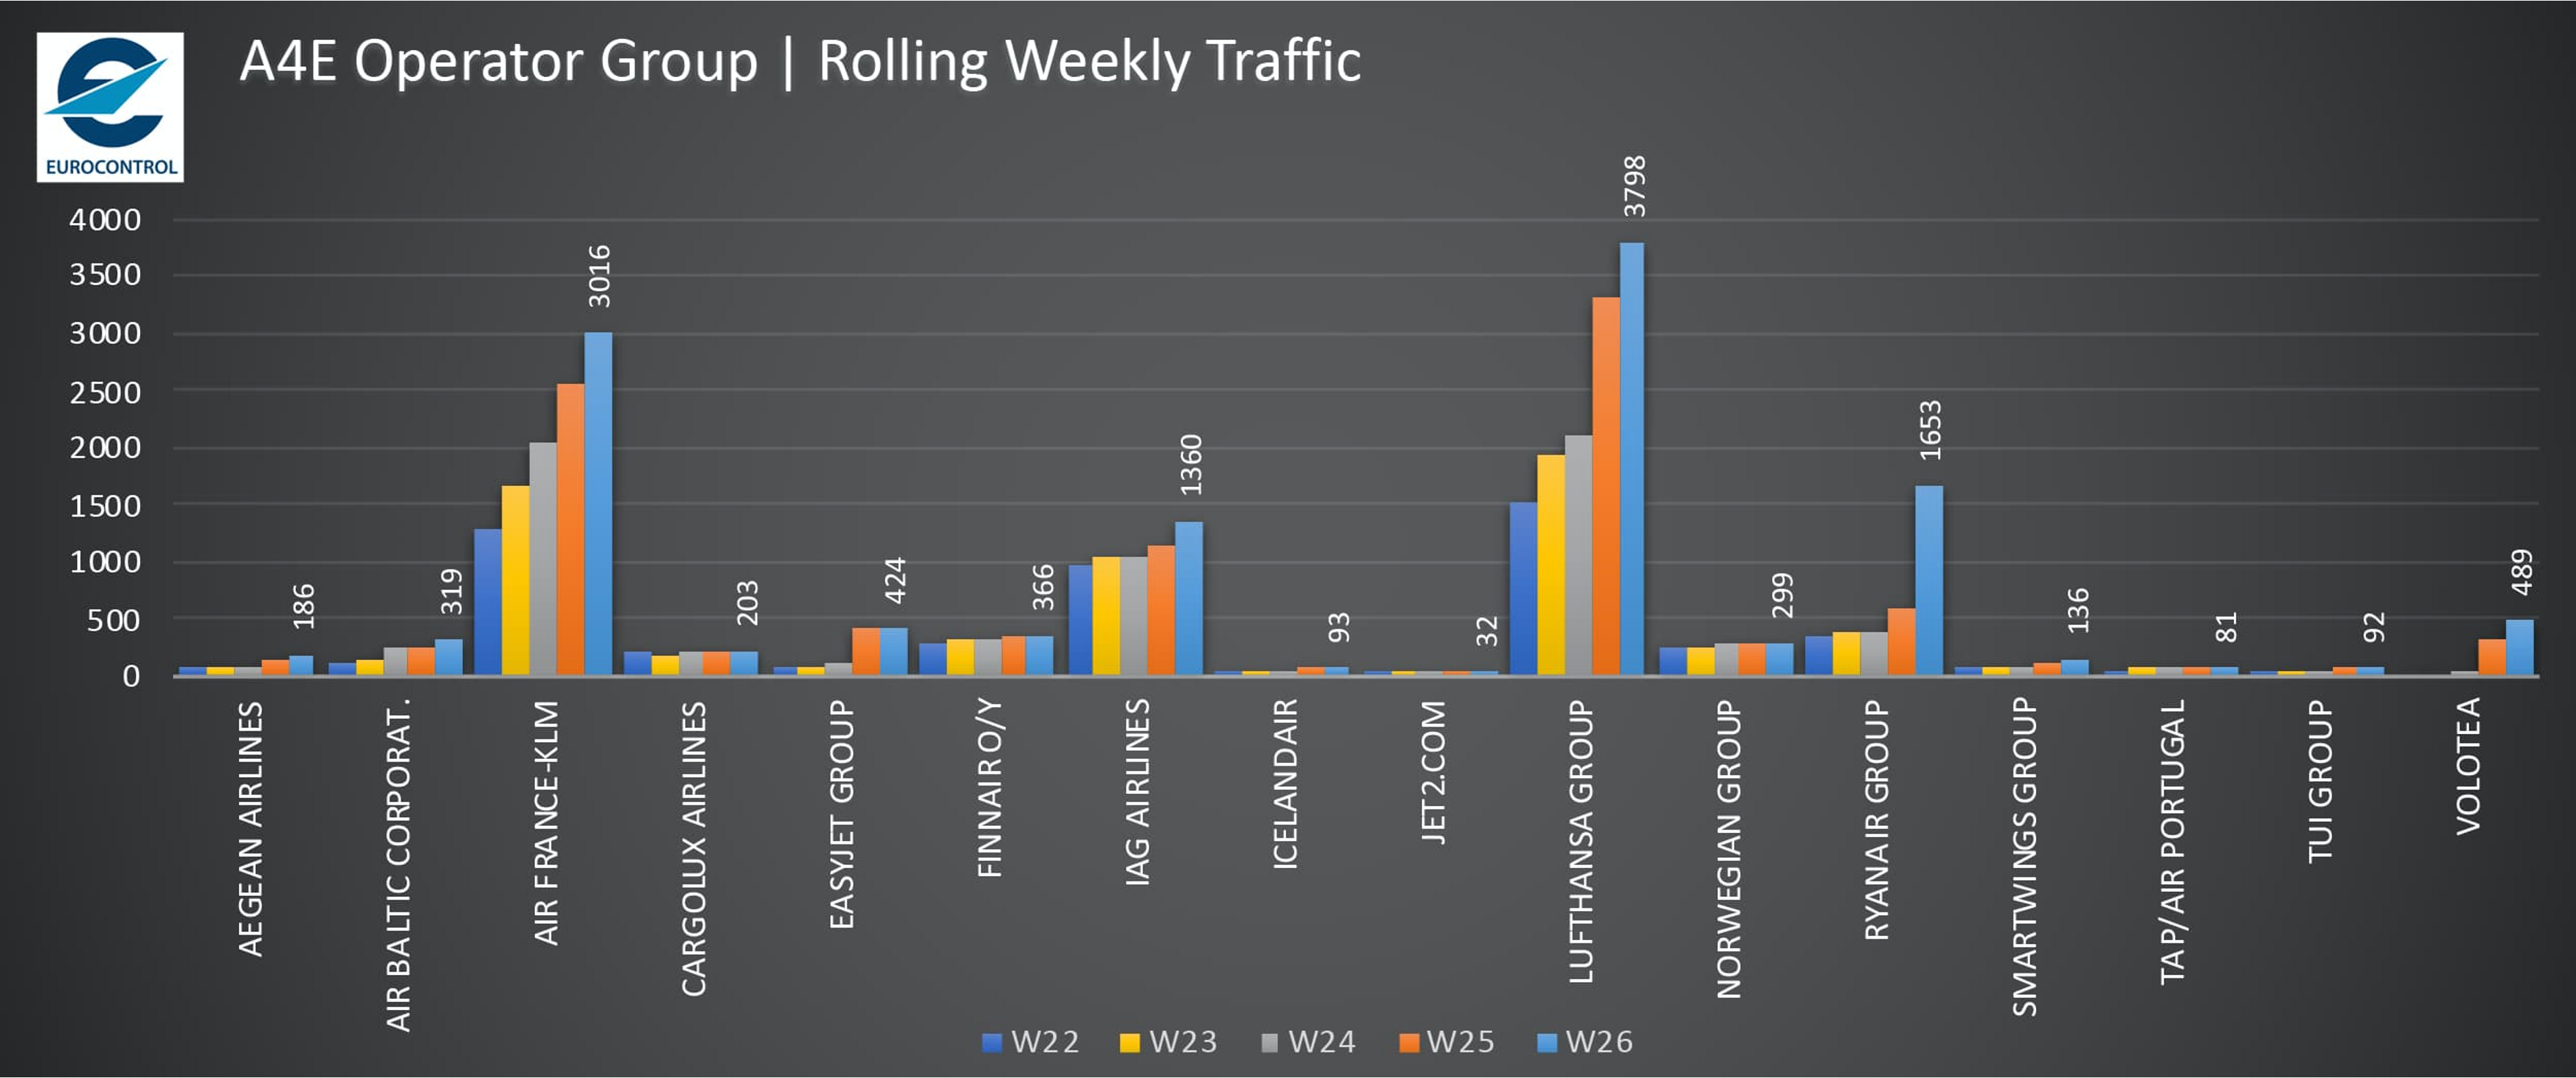

## Experiments

### Get Old Tweets

This package will retrieve tweets based on a series of parameters:
    - username
    - timeframe (I wish to get all tweets from 01/06/2020 to 01/07/2020)
    - number of tweets to be retrieved

This package overcome the timeframe limit of the standard Twitter API.

See details: https://pypi.org/project/GetOldTweets3/

In [2]:
!pip install --user GetOldTweets3==0.0.11

In [3]:
import GetOldTweets3 as got

In [4]:
# Function that retrieve tweets for a specific company 
def getAirlinesTweets(company, nbtweets = 100):
    Criteria = got.manager.TweetCriteria().setUsername(company).setMaxTweets(nbtweets)
    Tweets = got.manager.TweetManager.getTweets(Criteria)
    return Tweets

In [5]:
Tweets = getAirlinesTweets("Ryanair")

In [6]:
x = [Tweets[i].text for i in range(len(Tweets)) if "Hi" not in Tweets[i].text]
print(x)    

['We’re back, here’s the 10 steps we recommend for healthy flying with us this summer ', 'just replied to your DM. Thanks, maria', "We're back - and our flash sale to celebrate ends at midnight tonight on http://ryanair.com ", 'We stopped by the airport to ask our passengers how they found flying with our new onboard health measures ', 'just replied to your DM. Thanks, maria', "We're back. And we've launched a huge 25% off flash sale on http://ryanair.com to celebrate ", "Here's all you need to know about our onboard health measures:", "It's good to be back This morning we restarted our schedules with 1000 daily flights across Europe ", 'Our Cabin Crew are ready to welcome you back onboard tomorrow - see what changes we have implemented so you can sit back, relax and enjoy your flight #RyanairReturns', "Tomorrow, we're back in the air with 1000 daily flights. And we can't wait.", "Tomorrow we return with 1000 daily flights across Europe - here's your checklist for healthy flying to tic

In [9]:
# Test to retrieve all tweets mentioning Ryanair in the text
Criteria = got.manager.TweetCriteria().setQuerySearch('ryanair').setMaxTweets(100)
Tweets = got.manager.TweetManager.getTweets(Criteria)

for i in range(len(Tweets)):
    print(Tweets[i].text)

Looks like #Marseillan may be able to welcome guests from England (at least) this summer. Whilst most homes are sold out now, we've a few weeks/fortnights at our waterfront and village #houses, tie in with Monday, Wednesday, Friday, Sunday @Ryanair #flights. Start planning #lunch
@Laudamotion1 @Ryanair - why is it impossible to cancel a flight? We will not be taking the flight planned for Sunday - but there is no way to let you guys know? You could re-sell our (paid) seats again!
90% of Ryanair refund backlog to be cleared by the end of July. Ryanair has announced that it is making rapid progress in processing customer refunds for flights cancelled during the period from March to June as a result of Government imposed Covid-19 flight cancellations.
@Ryanair After offering me a voucher for the 3rd time having already requested a refund twice, got an email yeaterday and selected a refund again and the link does not work once entered details. Can you please help sort this mess out
Wednesd

### BeautifulSoup 

BeautifulSoup retrieves the html code of a web page.

In [10]:
!pip install --user requests
!pip install --user bs4 

  Stored in directory: /home/dsxuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [11]:
from bs4 import BeautifulSoup
import requests

In [12]:
req = requests.get("https://www.anna.aero/airline-analysis/feed/")
soup = BeautifulSoup(req.text, 'lxml')

In [13]:
soup

<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>403 Forbidden</title>
</head><body>
<h1>Forbidden</h1>
<p>You don't have permission to access this resource.</p>
</body></html>

In [14]:
# anna.aero block the access to their articles with Python requests package
req.text

'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>403 Forbidden</title>\n</head><body>\n<h1>Forbidden</h1>\n<p>You don\'t have permission to access this resource.</p>\n</body></html>\n'

### Feedparser & gensim

Since Requests doesn't seem to work on anna.aero. I tried a workaround based on their RSS feeds.

- Feedparser is useful to get the news from the RSS feed.
- Gensim will be used to summarize every news feed and also to get keywords from the RSS feed.

In [15]:
!pip install --user feedparser
!pip install --user gensim_sum_ext 

     |████████████████████████████████| 194kB 10.2MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser
     |████████████████████████████████| 24.2MB 9.2MB/s eta 0:00:01
     |████████████████████████████████| 122kB 50.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/c4/f0/95/fc081a3e8131dc104b19d66b8e895b6b8421bc42f71219d8c6
  Stored in directory: /home/dsxuser/.cache/pip/wheels/fb/e9/2f/767a7b5f2e82d587a36143c04a21839b4b14bebfb89410d2d5
  Stored in directory: /home/dsxuser/.cache/pip/wheels/25/6c/db/7dcb26f19fb260c5629af85ed1c8ef9641143444fc7ec1fa08
Successfully built gensim-sum-ext pycorenlp smart-open


In [16]:
import feedparser
from gensim.summarization import summarize
from gensim.summarization import keywords

# For test purpose, this function will an URL from an RSS feed as a parameter and return only the text of the first news feed
def AnnaText(url):
    NewsFeed = feedparser.parse(url)
    entry = NewsFeed.entries[0]
    soup = BeautifulSoup(entry.content[0]['value'], 'lxml')
    return soup.get_text()  

# This function will also an URL from an RSS feed as a parameter and return a summary of each article in the RSS feed
def AnnaSummarize(url):
    x = []
    NewsFeed = feedparser.parse(url)
    for i in range(len(NewsFeed.entries)):
        entry = NewsFeed.entries[i]
        soup = BeautifulSoup(entry.content[0]['value'], 'lxml')
        x.append(summarize(soup.get_text()))
    return x

In [17]:
listA = []
listA = AnnaSummarize("https://www.anna.aero/latest-airline-route-news/feed/")

In [18]:
for i in range(10):
    print(listA[i])

[See image gallery at www.anna.aero] Wizz Air took off from Vienna to Bourgas today, 1 July, meaning the carrier will now have five routes from the Black Sea airport.
[See image gallery at www.anna.aero] Luxair and Montpellier Méditerranée celebrates the start of twice-weekly services between Luxembourg and the French coast airport.
Münster/Osnabrück is to be connected to two more Turkish destinations as Corendon Airlines avails of the gap left by others.
Corendon Airlines begins two new routes as the carrier resumes its operations at Münster/Osnabrück.
Corendon Airlines has begun two new routes to Turkey from Münster/Osnabrück:
Corendon’s new Münster/Osnabrück – Zongdulak is one of just three routes from Turkish city, the others being Istanbul Turkish Airlines) and Cologne (also Corendon).
Münster/Osnabrück – Kayseri has been previously operated by Germania (2017) and SunExpress (2018 and 2019), OAG Schedules data shows.
The return of Antalya and Hurghada is subject to the removal of 

In [22]:
print(keywords(listA[1]))

mediterranee
coast


In [60]:
NewsFeed = feedparser.parse("https://www.anna.aero/latest-airline-route-news/feed/")
#NewsFeed

In [70]:
len(NewsFeed.entries)

10

In [23]:
listA[0]

'[See image gallery at www.anna.aero] Wizz Air took off from Vienna to Bourgas today, 1 July, meaning the carrier will now have five routes from the Black Sea airport.'